CODE BLOCK: 1

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from utils import device, build_loader, train, test
from model import Net

CODE BLOCK: 2

In [2]:
# CUDA?
# cuda = torch.cuda.is_available()
# print("CUDA Available?", cuda)

CODE BLOCK: 3

In [3]:
# Train data transformations
train_transforms = transforms.Compose([
    transforms.RandomApply([transforms.CenterCrop(22), ], p=0.1),
    transforms.Resize((28, 28)),
    transforms.RandomRotation((-15., 15.), fill=0),
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,)),
    ])

# Test data transformations
test_transforms = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
    ])

CODE BLOCK: 4

In [4]:
train_data = datasets.MNIST('../data', train=True, download=True, transform=train_transforms)
test_data = datasets.MNIST('../data', train=False, download=True, transform=test_transforms)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ../data\MNIST\raw\train-images-idx3-ubyte.gz to ../data\MNIST\raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ../data\MNIST\raw\train-labels-idx1-ubyte.gz to ../data\MNIST\raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ../data\MNIST\raw\t10k-images-idx3-ubyte.gz to ../data\MNIST\raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ../data\MNIST\raw\t10k-labels-idx1-ubyte.gz to ../data\MNIST\raw



CODE BLOCK: 5

In [5]:
batch_size = 512
train_loader, test_loader = build_loader(batch_size, train_data, test_data)

CODE BLOCK: 6

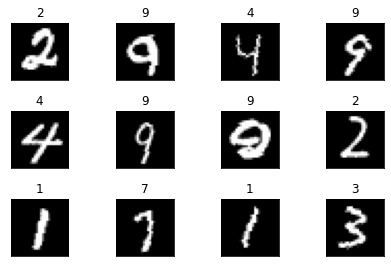

In [6]:
import matplotlib.pyplot as plt

batch_data, batch_label = next(iter(train_loader)) 

fig = plt.figure()

for i in range(12):
  plt.subplot(3,4,i+1)
  plt.tight_layout()
  plt.imshow(batch_data[i].squeeze(0), cmap='gray')
  plt.title(batch_label[i].item())
  plt.xticks([])
  plt.yticks([])

CODE BLOCK: 7

In [7]:
# class Net(nn.Module):
#     #This defines the structure of the NN.
#     def __init__(self):
#         super(Net, self).__init__()
#         self.conv1 = nn.Conv2d(1, 32, kernel_size=3)
#         self.conv2 = nn.Conv2d(32, 64, kernel_size=3)
#         self.conv3 = nn.Conv2d(64, 128, kernel_size=3)
#         self.conv4 = nn.Conv2d(128, 256, kernel_size=3)
#         self.fc1 = nn.Linear(4096, 50)
#         self.fc2 = nn.Linear(50, 10)

#     def forward(self, x):
#         x = F.relu(self.conv1(x), 2) # 28>26 | 1>3 | 1>1
#         x = F.relu(F.max_pool2d(self.conv2(x), 2)) #26>24>12 | 3>5>6 | 1>1>2
#         x = F.relu(self.conv3(x), 2) # 12>10 | 6>10 | 2>2
#         x = F.relu(F.max_pool2d(self.conv4(x), 2)) # 10>8>4 | 10>14>16 | 2>2>4
#         x = x.view(-1, 4096) # 4*4*256 = 4096
#         x = F.relu(self.fc1(x))
#         x = self.fc2(x)
#         return F.log_softmax(x, dim=1)

In [8]:
# !pip install torchsummary
from torchsummary import summary

model = Net().to(device)
summary(model, input_size=(1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 26, 26]             320
            Conv2d-2           [-1, 64, 24, 24]          18,496
            Conv2d-3          [-1, 128, 10, 10]          73,856
            Conv2d-4            [-1, 256, 8, 8]         295,168
            Linear-5                   [-1, 50]         204,850
            Linear-6                   [-1, 10]             510
Total params: 593,200
Trainable params: 593,200
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.67
Params size (MB): 2.26
Estimated Total Size (MB): 2.94
----------------------------------------------------------------


In [9]:
# class Net2(nn.Module):
#     #This defines the structure of the NN.
#     def __init__(self):
#         super(Net2, self).__init__()
#         self.conv1 = nn.Conv2d(1, 32, kernel_size=3, bias=False)
#         self.conv2 = nn.Conv2d(32, 64, kernel_size=3, bias=False)
#         self.conv3 = nn.Conv2d(64, 128, kernel_size=3, bias=False)
#         self.conv4 = nn.Conv2d(128, 256, kernel_size=3, bias=False)
#         self.fc1 = nn.Linear(4096, 50, bias=False)
#         self.fc2 = nn.Linear(50, 10, bias=False)

#     def forward(self, x):
#         x = F.relu(self.conv1(x), 2) # 28>26 | 1>3 | 1>1
#         x = F.relu(F.max_pool2d(self.conv2(x), 2)) #26>24>12 | 3>5>6 | 1>1>2
#         x = F.relu(self.conv3(x), 2) # 12>10 | 6>10 | 2>2
#         x = F.relu(F.max_pool2d(self.conv4(x), 2)) # 10>8>4 | 10>14>16 | 2>2>4
#         x = x.view(-1, 4096) # 4*4*256 = 4096
#         x = F.relu(self.fc1(x))
#         x = self.fc2(x)
#         return F.log_softmax(x, dim=1)

kwargs = {'bias': False}
model = Net(**kwargs).to(device)
summary(model, input_size=(1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 26, 26]             288
            Conv2d-2           [-1, 64, 24, 24]          18,432
            Conv2d-3          [-1, 128, 10, 10]          73,728
            Conv2d-4            [-1, 256, 8, 8]         294,912
            Linear-5                   [-1, 50]         204,800
            Linear-6                   [-1, 10]             500
Total params: 592,660
Trainable params: 592,660
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.67
Params size (MB): 2.26
Estimated Total Size (MB): 2.93
----------------------------------------------------------------


CODE BLOCK: 8

In [10]:
# Data to plot accuracy and loss graphs
train_losses = []
test_losses = []
train_acc = []
test_acc = []

test_incorrect_pred = {'images': [], 'ground_truths': [], 'predicted_vals': []}

CODE BLOCK: 9

In [11]:

# from tqdm import tqdm

# def GetCorrectPredCount(pPrediction, pLabels):
#   return pPrediction.argmax(dim=1).eq(pLabels).sum().item()

# def train(model, device, train_loader, optimizer, criterion):
#   model.train()
#   pbar = tqdm(train_loader)

#   train_loss = 0
#   correct = 0
#   processed = 0

#   for batch_idx, (data, target) in enumerate(pbar):
#     data, target = data.to(device), target.to(device)
#     optimizer.zero_grad()

#     # Predict
#     pred = model(data)

#     # Calculate loss
#     loss = criterion(pred, target)
#     train_loss+=loss.item()

#     # Backpropagation
#     loss.backward()
#     optimizer.step()
    
#     correct += GetCorrectPredCount(pred, target)
#     processed += len(data)

#     pbar.set_description(desc= f'Train: Loss={loss.item():0.4f} Batch_id={batch_idx} Accuracy={100*correct/processed:0.2f}')

#   train_acc.append(100*correct/processed)
#   train_losses.append(train_loss/len(train_loader))

# def test(model, device, test_loader, criterion):
#     model.eval()

#     test_loss = 0
#     correct = 0

#     with torch.no_grad():
#         for batch_idx, (data, target) in enumerate(test_loader):
#             data, target = data.to(device), target.to(device)

#             output = model(data)
#             test_loss += criterion(output, target, reduction='sum').item()  # sum up batch loss

#             correct += GetCorrectPredCount(output, target)


#     test_loss /= len(test_loader.dataset)
#     test_acc.append(100. * correct / len(test_loader.dataset))
#     test_losses.append(test_loss)

#     print('Test set: Average loss: {:.4f}, Accuracy: {}/{} ({:.2f}%)\n'.format(
#         test_loss, correct, len(test_loader.dataset),
#         100. * correct / len(test_loader.dataset)))
     

CODE BLOCK: 10

In [15]:
# model = Net().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=15, gamma=0.1, verbose=True)
# New Line
criterion = F.nll_loss
num_epochs = 5

for epoch in range(1, num_epochs+1):
  print(f'Epoch {epoch}')
  train_accuracy, train_loss = train(model, device, train_loader, optimizer, criterion)
  train_acc.append(train_accuracy)
  train_losses.append(train_loss)

  test_accuracy, test_loss = test(model, device, test_loader, criterion)
  test_acc.append(test_accuracy)
  test_losses.append(test_loss)
  scheduler.step()

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 1


Train: Loss=0.0044 Batch_id=117 Accuracy=98.81: 100%|██████████| 118/118 [00:30<00:00,  3.82it/s]


Test set: Average loss: 0.0250, Accuracy: 9910/10000 (99.10%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 2


Train: Loss=0.0260 Batch_id=117 Accuracy=98.78: 100%|██████████| 118/118 [00:31<00:00,  3.73it/s]


Test set: Average loss: 0.0282, Accuracy: 9901/10000 (99.01%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 3


Train: Loss=0.0191 Batch_id=117 Accuracy=98.86: 100%|██████████| 118/118 [00:30<00:00,  3.87it/s]


Test set: Average loss: 0.0227, Accuracy: 9913/10000 (99.13%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 4


Train: Loss=0.0708 Batch_id=117 Accuracy=98.94: 100%|██████████| 118/118 [00:28<00:00,  4.15it/s]


Test set: Average loss: 0.0213, Accuracy: 9930/10000 (99.30%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 5


Train: Loss=0.0103 Batch_id=117 Accuracy=98.94: 100%|██████████| 118/118 [00:28<00:00,  4.15it/s]


Test set: Average loss: 0.0214, Accuracy: 9927/10000 (99.27%)

Adjusting learning rate of group 0 to 1.0000e-02.


CODE BLOCK: 11

Text(0.5, 1.0, 'Test Accuracy')

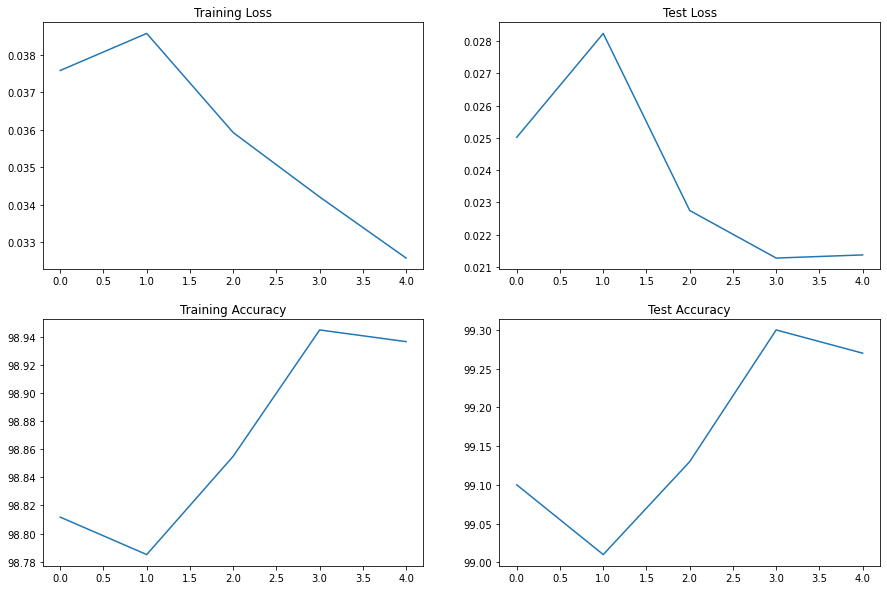

In [17]:
fig, axs = plt.subplots(2,2,figsize=(15,10))
axs[0, 0].plot(train_losses)
axs[0, 0].set_title("Training Loss")
axs[1, 0].plot(train_acc)
axs[1, 0].set_title("Training Accuracy")
axs[0, 1].plot(test_losses)
axs[0, 1].set_title("Test Loss")
axs[1, 1].plot(test_acc)
axs[1, 1].set_title("Test Accuracy")